In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [3]:
df = pd.read_csv('processed.csv')

In [4]:
df.drop(['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.2'],axis=1,inplace=True)

In [10]:
num_merged = df.select_dtypes(include = ['int64', 'float64'])
fig, axes = plt.subplots(nrows = 19, ncols = 1, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.histplot(num_merged[column].dropna(), ax = ax, color = 'darkred',kde=True)
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

<Axes: xlabel='DATE', ylabel='Diff_house_inventory'>

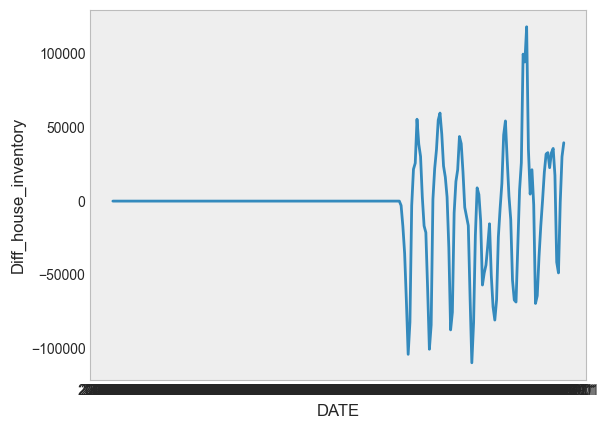

In [8]:
sns.lineplot(x = 'DATE', y = 'Diff_house_inventory', data = df)

In [6]:
df['Diff_house_inventory'].loc[df[']Diff_house_inventory'] == df['Diff_house_inventory'].max()] =0

KeyError: ']Diff_house_inventory'

In [5]:

df['Diff_house_inventory'].loc[df['Diff_house_inventory'] == df['Diff_house_inventory'].max()] =0

C:\Users\ansh0\AppData\Local\Temp\ipykernel_33564\2853679699.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ansh0\AppData\Local\Temp\ipykernel_33564\2853679699.py:1: SettingWithCopyWarning:


A value is trying to be set on a co

In [35]:
'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return fig
    
'''Function to plot histogram'''
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [6]:
y_train=df['house_price_diff']

In [38]:
title = 'SalePrice without Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'darkred')

ValueError: Data must be positive.

In [41]:
skew_merged = pd.DataFrame(data = df.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

In [11]:
df.drop(['house_price_diff'],axis=1,inplace=True)

In [53]:
y_train

0      0.000
1      0.895
2      0.792
3      0.737
4      0.850
       ...  
251    0.811
252    1.285
253    1.529
254    0.960
255    0.831
Name: house_price_diff, Length: 256, dtype: float64

In [27]:
for i in df.columns:
    if i =='DATE':
        continue
    x = df[i]
    print(i)
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

    # Creating the dataset, and generating the plot
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = 'markers',
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines',
                  marker = dict(color = 'green'),
                  name='Fit'
                  )

    # Layout for regression plot
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(df[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


house_price


gdp_growth


house_inventory


Diff_house_inventory


inflation


material_cost


mortgage_rate


population_growth


shares


Unemployment


vacancy_rate


Total


1 unit


2 to 4


5 units


rent_price


In [7]:
from sklearn.preprocessing import RobustScaler
date =df.DATE
df.drop(['DATE'],axis=1,inplace=True)
'''Initialize robust scaler object.'''
robust_scl = RobustScaler()

'''Fit scaler object on train data.'''
robust_scl.fit(df)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = robust_scl.transform(df)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

seed = 42

linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)


In [67]:
def train_r2(model):
    model.fit(df_merged_num_scaled, y_train)
    return model.score(df_merged_num_scaled, y_train)

'
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))

train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 14
[LightGBM] [Info] Start training from score 0.744480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [9]:
df.drop(['5 ratio'],axis=1,inplace=True)

In [48]:

def cross_validate(model, dfa,y_train_a):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, dfa, y_train_a, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model,df, y_train))

x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
fig = scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')
fig.write_html('graphs/crossval.html')

In [71]:
def plot_feature_importance(model, title):
    model.fit(df_merged_num_scaled, y_train)
    coef = pd.DataFrame({'Feature':df.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

plot_feature_importance(lasso, 'Lasso Feature Importance')
plot_feature_importance(ridge, 'Ridge Feature Importance')
plot_feature_importance(elnt, 'ElasticNet Feature Importance')

In [72]:
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Features': df.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)
    
plot_featute_importance(xgb, 'XGB Feature Importance')
plot_featute_importance(gb, 'GB Feature Importance')
plot_featute_importance(lgb, 'LGB Feature Importance')

In [32]:

total_rows = len(df)

rows_per_part = total_rows 


df_parts = [
    df.iloc[:rows_per_part].reset_index(drop=True),
    df.iloc[rows_per_part:2*rows_per_part].reset_index(drop=True),
    df.iloc[2*rows_per_part:3*rows_per_part].reset_index(drop=True),
    df.iloc[3*rows_per_part:].reset_index(drop=True)
]

In [33]:
for i in df_parts:
    print( i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gdp_growth            64 non-null     float64
 1   house_inventory       64 non-null     float64
 2   Diff_house_inventory  64 non-null     float64
 3   inflation             64 non-null     float64
 4   material_cost         64 non-null     float64
 5   mortgage_rate         64 non-null     float64
 6   population_growth     64 non-null     float64
 7   shares                64 non-null     float64
 8   Unemployment          64 non-null     float64
 9   vacancy_rate          64 non-null     float64
 10  Total                 64 non-null     float64
 11  1 unit                64 non-null     float64
 12  2 to 4                64 non-null     float64
 13  5 units               64 non-null     float64
 14  rent_price            64 non-null     float64
dtypes: float64(15)
memory usa

In [11]:

total_rows = len(df)
rows_per_part = total_rows // 4

y_train_parts = [
    y_train.iloc[:rows_per_part].reset_index(drop=True),
    y_train.iloc[rows_per_part:2*rows_per_part].reset_index(drop=True),
    y_train.iloc[2*rows_per_part:3*rows_per_part].reset_index(drop=True),
    y_train.iloc[3*rows_per_part:].reset_index(drop=True)
]

In [12]:
y_train.fillna(0,inplace=True)

In [36]:

def cross_validate(model, dfa,y_train_a):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, dfa, y_train_a, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb,lgb]
cross_val_scores = []

for i in range(0,4):
    cross_val_scores=[]
    for model in models:
        print(i)
        print(model)
        cross_val_scores.append(cross_validate(model, df_parts[i], y_train_parts[i]))
    

    x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
    x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB','lgb']
    x_val_score = x_val_score.round(5)
    x = x_val_score.index
    y = x_val_score['Cross Validation Scores (RMSE)']
    title = "Models' 10-fold Cross Validation Scores (RMSE)"
    fig = scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')
    fig.write_html(f'graphs/{i} crossval.html')

0
Lasso(random_state=42)
0
Ridge(random_state=42)
0
KernelRidge()
0
ElasticNet(random_state=42)
0
DecisionTreeRegressor(random_state=42)
0
SVR()
0
KNeighborsRegressor(n_jobs=-1)
0
RandomForestRegressor(n_jobs=-1, random_state=42)
0
ExtraTreesRegressor(n_jobs=-1, random_state=42)
0
AdaBoostRegressor(random_state=42)
0
GradientBoostingRegressor(random_state=42)
0
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             mul

In [27]:
df.isna().sum()

house_price             0
gdp_growth              0
house_inventory         0
Diff_house_inventory    0
inflation               0
material_cost           0
mortgage_rate           0
population_growth       0
shares                  0
Unemployment            0
vacancy_rate            0
Total                   0
1 unit                  0
2 to 4                  0
5 units                 0
5 ratio                 4
rent_price              0
dtype: int64

In [13]:
for i in df_parts:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_price           64 non-null     float64
 1   gdp_growth            64 non-null     float64
 2   house_inventory       64 non-null     float64
 3   Diff_house_inventory  64 non-null     float64
 4   inflation             64 non-null     float64
 5   material_cost         64 non-null     float64
 6   mortgage_rate         64 non-null     float64
 7   population_growth     64 non-null     float64
 8   shares                64 non-null     float64
 9   Unemployment          64 non-null     float64
 10  vacancy_rate          64 non-null     float64
 11  Total                 64 non-null     float64
 12  1 unit                64 non-null     float64
 13  2 to 4                64 non-null     float64
 14  5 units               64 non-null     float64
 15  house_price_diff      63 

In [31]:
df.drop(['5 ratio'],axis=1,inplace=True)

In [39]:
y_train.fillna(0,inplace=True)

In [40]:
y_train.isna().sum()

np.int64(0)

In [31]:
df.drop(['house_price'],axis=1,inplace=True)

In [38]:
def plot_feature_importance(model, title,dfa,y_train_a,i):
    model.fit(dfa, y_train_a)
    coef = pd.DataFrame({'Feature':df.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    fig.write_html(f'graphs/{title} {i}.html')
    iplot(fig)

for i in range(0,4):
    plot_feature_importance(lasso, 'Lasso Feature Importance',df_parts[i],y_train_parts[i],i)
    plot_feature_importance(ridge, 'Ridge Feature Importance',df_parts[i],y_train_parts[i],i)
    plot_feature_importance(elnt, 'ElasticNet Feature Importance',df_parts[i],y_train_parts[i],i)

In [17]:
for i in df_parts:
    print(i.isna().sum())

house_price             0
gdp_growth              0
house_inventory         0
Diff_house_inventory    0
inflation               0
material_cost           0
mortgage_rate           0
population_growth       0
shares                  0
Unemployment            0
vacancy_rate            0
Total                   0
1 unit                  0
2 to 4                  0
5 units                 0
house_price_diff        1
rent_price              0
dtype: int64
house_price             0
gdp_growth              0
house_inventory         0
Diff_house_inventory    0
inflation               0
material_cost           0
mortgage_rate           0
population_growth       0
shares                  0
Unemployment            0
vacancy_rate            0
Total                   0
1 unit                  0
2 to 4                  0
5 units                 0
house_price_diff        0
rent_price              0
dtype: int64
house_price             0
gdp_growth              0
house_inventory         0
Diff_house_i

In [18]:
df.drop(['house_price_diff'],axis=1,inplace=True)

In [22]:
for i in y_train_parts:
    print(i.isna().sum())

1
0
0
0


In [23]:
y_train_parts[0].fillna(0,inplace=True)

In [40]:
def plot_featute_importance(model, title,dfa,y_train_a,i):
    model.fit(dfa, y_train_a)
    importance = pd.DataFrame({'Features': df.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    fig.write_html(f'graphs/{title} {i}.html')
    
for i in range(0,4):
    plot_featute_importance(xgb, 'XGB Feature Importance',df_parts[i],y_train_parts[i],i)
    plot_featute_importance(gb, 'GB Feature Importance',df_parts[i],y_train_parts[i],i)
    plot_featute_importance(lgb, 'LGB Feature Importance',df_parts[i],y_train_parts[i],i)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 13
[LightGBM] [Info] Start training from score 0.623063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [49]:
plot_featute_importance(gb, 'GB Feature Importance',df,y_train,'total')